In [ ]:


from email_utils import authenticate_gmail, fetch_emails, extract_email_addresses
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
print("Authenticating with Gmail API...")
service = authenticate_gmail()
print("Authentication successful!")


Authenticating with Gmail API...
Authentication successful!


In [11]:
print(f"Running Gmail query: {query}")
email_df = fetch_emails(service, query=query, total_limit=50)
print(f"Fetched {len(email_df)} emails")





Running Gmail query: label:inbox
Fetched 50 emails


In [15]:
query = "newer_than:7d"
response = service.users().messages().list(userId='me', q=query).execute()
messages = response.get('messages', [])
print(f"Found {len(messages)} messages.")





Found 100 messages.


In [19]:
from email_utils import get_email_details  # Ensure this function is defined in your email_utils.py

emails_data = []

for msg in messages:
    msg_id = msg['id']
    email_details = get_email_details(service, msg_id)
    emails_data.append(email_details)

# Convert the list of email details to a DataFrame
df = pd.DataFrame(emails_data)
print(df.head())


                                              Sender  \
0                 Wanderu <chiku@travel.wanderu.com>   
1                Amy at Adzuna <no-reply@adzuna.com>   
2     "justfly.com" <justfly@email.justflyemail.com>   
3  "Iribe Initiative for Inclusion and ... (via S...   
4  Quora Suggested Spaces <politicalperspective1-...   

                                             Subject  \
0  Allan, this is your reminder to book a Memoria...   
1     Surreal are looking for a Founding AI Engineer   
2   ✈ Round Trip Flights from $76.29 | Available Now   
3                      Koree Perry sent you messages   
4  BREAKING: White House Press Secretary Karoline...   

                              Date  \
0  Thu, 08 May 2025 20:39:56 +0000   
1   Thu, 8 May 2025 18:04:49 +0000   
2  Thu, 08 May 2025 11:01:15 -0600   
3   Thu, 8 May 2025 16:29:55 +0000   
4  Thu, 08 May 2025 14:27:42 +0000   

                                                Body  
0  MDW is in two weeks! 🚌🚂🇺🇸\n\nhttps://li

In [20]:
from email_utils import authenticate_gmail, fetch_emails, extract_email_addresses

service = authenticate_gmail()
df = fetch_emails(service, query="label:inbox", total_limit=50)
df.head()

emails = extract_email_addresses(df)
print(emails)


{'noreply@medium.com', 'referrals@integral.xyz', 'm@mertdev.dev', 'frustratedcitizen-space@quora.com', 'team@interviewquery.com', 'essilorluxottica-jobnotification@noreply12.jobs2web.com', 'YouTube@2x', 'kingallan.35@gmail.com', 'no-reply-account-statement@reportsmailer.zerodha.net', 'info@glassdoor.com', 'AlamoRentACar@email.alamo.com', 'Microsoft@2x', 'baur.krykpayev@gmail.com', 'bolbi@adsgency.ai', 'chiku@travel.wanderu.com', 'cs.sbi@kfintech.com', 'kingallan.35@gmail.com.', 'paul@cousinlabs.com', 'english-personalized-digest@quora.com', 'justfly@email.justflyemail.com', 'handshake@m.joinhandshake.com', 'rron@solarawealth.com', 'hello@mail.apollo.io', 'discover@services.discover.com', 'support@read.ai', 'Apple_App_Store_Badge_US-UK@2x', 'Facebook@2x', 'notification@slack.com', 'investor.seva@sbi.co.in', '2022ci_niroopnr_a@nie.ac.in', 'jarrod@arc.computer', 'noreply@redditmail.com', 'politicalperspective1-space@quora.com', 'einward.ris@kfintech.com', 'svaudry@shippedhospitality.com',

In [21]:
query = "label:inbox"  # You can modify this to subject:Invoice after:2024/01/01 etc.
print(f"Running Gmail query: {query}")
emails_df = fetch_emails(service, query=query, total_limit=50)
print(f"Fetched {len(emails_df)} emails.")

Running Gmail query: label:inbox
Fetched 50 emails.


In [22]:
emails_df.head()

,Sender,Subject,Date,Body
0,Wanderu <chiku@travel.wanderu.com>,"Allan, this is your reminder to book a Memoria...","Thu, 08 May 2025 20:39:56 +0000",MDW is in two weeks! 🚌🚂🇺🇸\n\nhttps://links.wan...
1,Amy at Adzuna <no-reply@adzuna.com>,Surreal are looking for a Founding AI Engineer,"Thu, 8 May 2025 18:04:49 +0000",\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,"""justfly.com"" <justfly@email.justflyemail.com>",✈ Round Trip Flights from $76.29 | Available Now,"Thu, 08 May 2025 11:01:15 -0600",JustFly \r\n \r\n\r\n \r\n \r\n \r\n\r\nhttp...
3,"""Iribe Initiative for Inclusion and ... (via S...",Koree Perry sent you messages,"Thu, 8 May 2025 16:29:55 +0000",Iribe Initiative for Inclusion and Diversity: ...
4,Quora Suggested Spaces <politicalperspective1-...,BREAKING: White House Press Secretary Karoline...,"Thu, 08 May 2025 14:27:42 +0000",Trending Stories from Liberals Turned into Tru...


In [23]:
unique_addresses = extract_email_addresses(emails_df)
print("\nUnique email addresses found:")
print(unique_addresses)


Unique email addresses found:
{'noreply@medium.com', 'referrals@integral.xyz', 'm@mertdev.dev', 'frustratedcitizen-space@quora.com', 'team@interviewquery.com', 'essilorluxottica-jobnotification@noreply12.jobs2web.com', 'YouTube@2x', 'kingallan.35@gmail.com', 'no-reply-account-statement@reportsmailer.zerodha.net', 'info@glassdoor.com', 'AlamoRentACar@email.alamo.com', 'Microsoft@2x', 'baur.krykpayev@gmail.com', 'bolbi@adsgency.ai', 'chiku@travel.wanderu.com', 'cs.sbi@kfintech.com', 'kingallan.35@gmail.com.', 'paul@cousinlabs.com', 'english-personalized-digest@quora.com', 'justfly@email.justflyemail.com', 'handshake@m.joinhandshake.com', 'rron@solarawealth.com', 'hello@mail.apollo.io', 'discover@services.discover.com', 'support@read.ai', 'Apple_App_Store_Badge_US-UK@2x', 'Facebook@2x', 'notification@slack.com', 'investor.seva@sbi.co.in', '2022ci_niroopnr_a@nie.ac.in', 'jarrod@arc.computer', 'noreply@redditmail.com', 'politicalperspective1-space@quora.com', 'einward.ris@kfintech.com', 's

In [ ]:
#  Step 5: Preview Body Content of First Email
if not emails_df.empty:
    print("\nSample Email Body Preview (First Email):")
    print(emails_df.iloc[0]["Body"][:500])
else:
    print("\nNo emails returned by the query.")


Sample Email Body Preview (First Email):
MDW is in two weeks! 🚌🚂🇺🇸

https://links.wanderu.com/z/sa1bmz510xgj04?uid=80ed117f-5295-45a4-afc6-f45ddd40e7e1&txnid=813328a2-833f-46b9-9b6b-42a066d9d88a&mid=ff3dbfbb-13a0-4252-9e09-307d88218971&bsft_aaid=1dc7dc5a-cb4f-4e77-93b4-4d2ed26ca10e&bsft_ek=2025-05-08T20%3A20%3A12Z&bsft_mime_type=text&bsft_tv=5&bsft_lx=1

[Buses](https://links.wanderu.com/z/sj1cmq5e0b4n04?uid=80ed117f-5295-45a4-afc6-f45ddd40e7e1&txnid=813328a2-833f-46b9-9b6b-42a066d9d88a&mid=ff3dbfbb-13a0-4252-9e09-307d88218971&bsft_aai


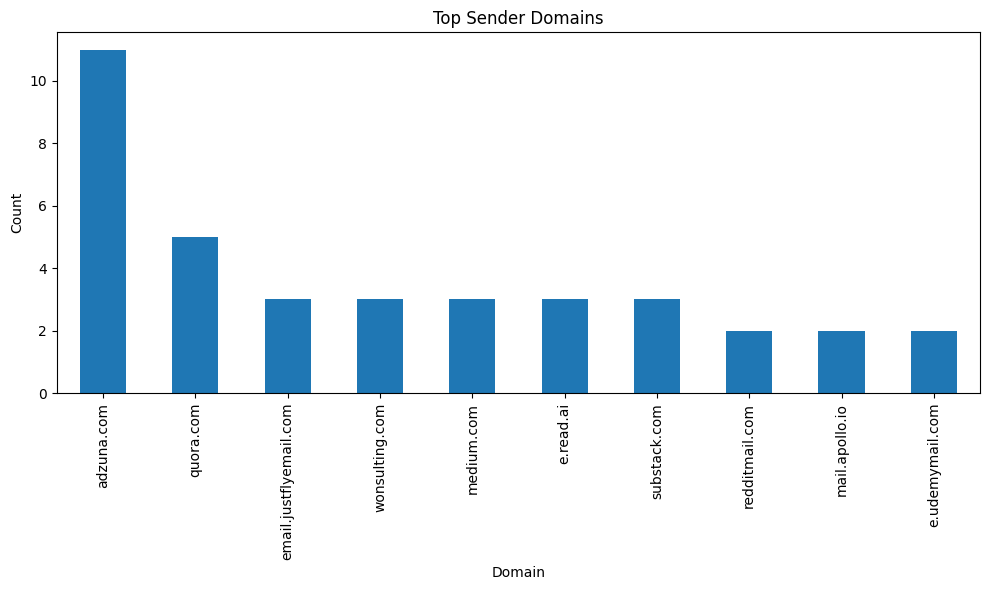

In [30]:
emails_df["Sender Domain"].value_counts().head(10).plot(
    kind="bar", 
    title="Top Sender Domains", 
    figsize=(10, 6),
    xlabel="Domain",
    ylabel="Count"
)
plt.tight_layout()
plt.show()
